# Análise de dados da cotação da Apple

## 1. Carregando as bibliotecas

In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Carregando os dados das ações da apple

In [2]:
# Usando a biblioteca do yahoo! finance podemos extrair os dados sobre as ações da apple na bolsa de valores.
# Aqui usamos o ticker  da apple 'AAPL' para que a biblioteca carregue os dados e atribua ao objeto ticker.
ticker = yf.Ticker('AAPL')

In [3]:
# A função ticker.history() permite criar um dataframe com os dados históricos das ações no tempo 
data = ticker.history(period='1y', interval='1d').reset_index()
data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-05-22,78.414141,79.273357,78.309848,79.188927,81803200,0.0,0.0
1,2020-05-26,80.333712,80.517471,78.595424,78.652542,125522000,0.0,0.0
2,2020-05-27,78.506028,79.144222,77.748626,78.995224,112945200,0.0,0.0
3,2020-05-28,78.662457,80.318800,78.379369,79.029984,133560800,0.0,0.0
4,2020-05-29,79.278326,79.750145,78.587978,78.953018,153532400,0.0,0.0


In [4]:
# Podemos especificar uma data de início e de término para exibir os dados históricos em um intervalo de tempo específico
start ='2021-02-01'
end = '2021-05-10'
ticker.history(interval='1d', start = start, end = end)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-02-01,133.323966,134.948778,130.512941,133.712723,106239800,0.000,0
2021-02-02,135.297661,135.875816,134.181234,134.560028,83305400,0.000,0
2021-02-03,135.327577,135.337555,133.184431,133.513382,89880900,0.000,0
2021-02-04,135.865853,136.962340,134.161293,136.952377,84183100,0.000,0
2021-02-05,137.117103,137.186976,135.629624,136.528091,75693800,0.205,0
...,...,...,...,...,...,...,...
2021-05-03,131.816094,133.842666,131.606459,132.315247,75135100,0.000,0
2021-05-04,130.967542,131.267036,126.485150,127.633202,137564700,0.000,0
2021-05-05,128.980915,130.228796,127.753005,127.882790,84000900,0.000,0


## 3. Plotando os dados históricos com o tempo 

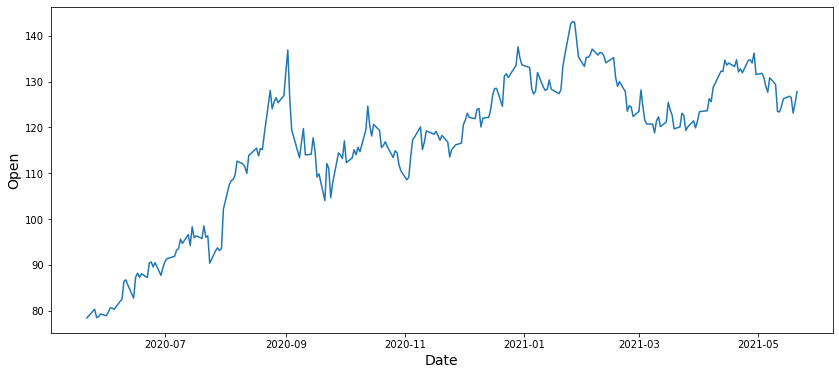

In [5]:
plt.figure(figsize = (14, 6))
plt.xlabel('Date', size = 14)
plt.ylabel('Open', size = 14)
sns.lineplot(x = data['Date'], y = data['Open']);

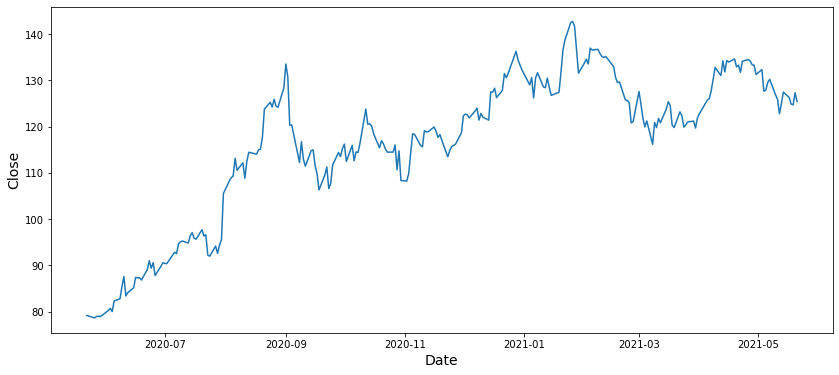

In [6]:
plt.figure(figsize = (14, 6))
plt.xlabel('Date', size = 14)
plt.ylabel('Close', size = 14)
sns.lineplot(x = data['Date'], y = data['Close']);

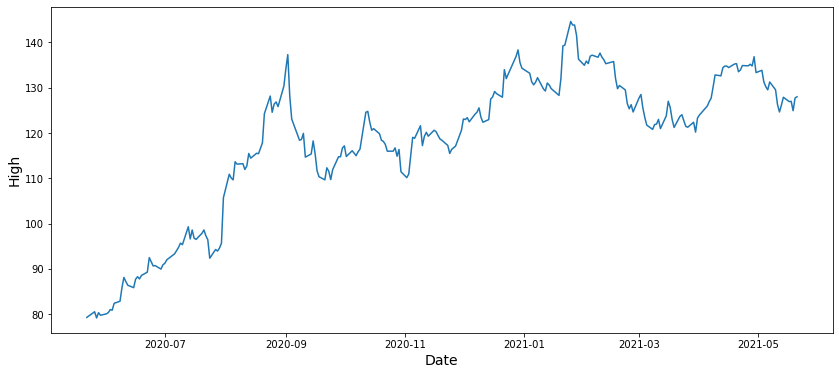

In [7]:
plt.figure(figsize = (14, 6))
plt.xlabel('Date', size = 14)
plt.ylabel('High', size = 14)
sns.lineplot(x = data['Date'], y = data['High']);

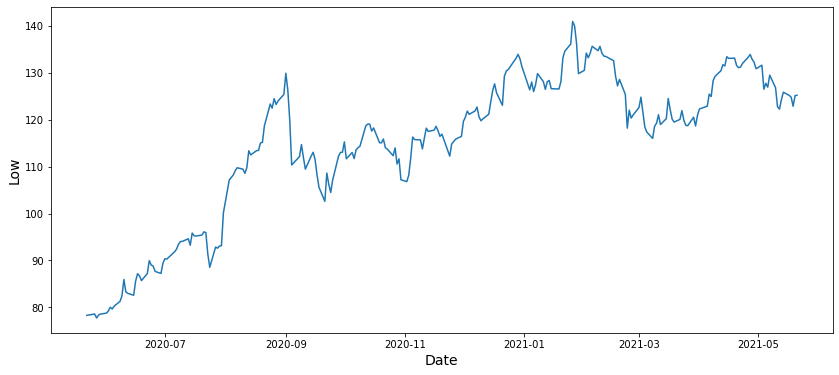

In [8]:
plt.figure(figsize = (14, 6))
plt.xlabel('Date', size = 14)
plt.ylabel('Low', size = 14)
sns.lineplot(x = data['Date'], y = data['Low']);

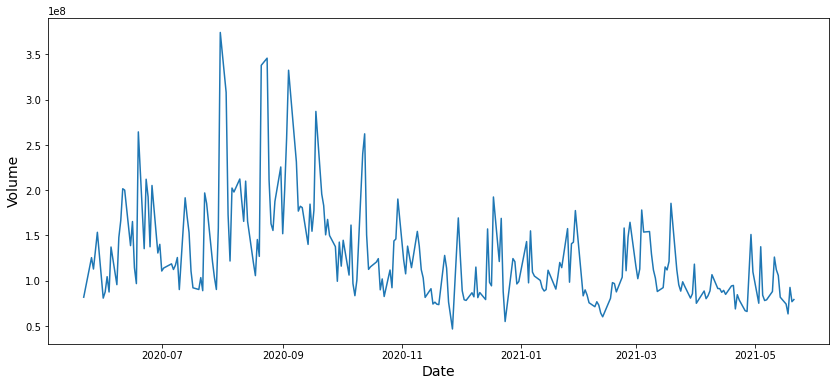

In [9]:
plt.figure(figsize = (14, 6))
plt.xlabel('Date', size = 14)
plt.ylabel('Volume', size = 14)
sns.lineplot(x = data['Date'], y = data['Volume']);

## Os gráficos da série histórica mostram o crecimento com o tempo do valor da cotação das ações da apple. Pórem, o último gráfico mostra que o volume de ações negociadas veio caindo até o fim do ano de 2020.

In [10]:
# Criando lista com  valores da série histórica das ações
columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends','Stock Splits']

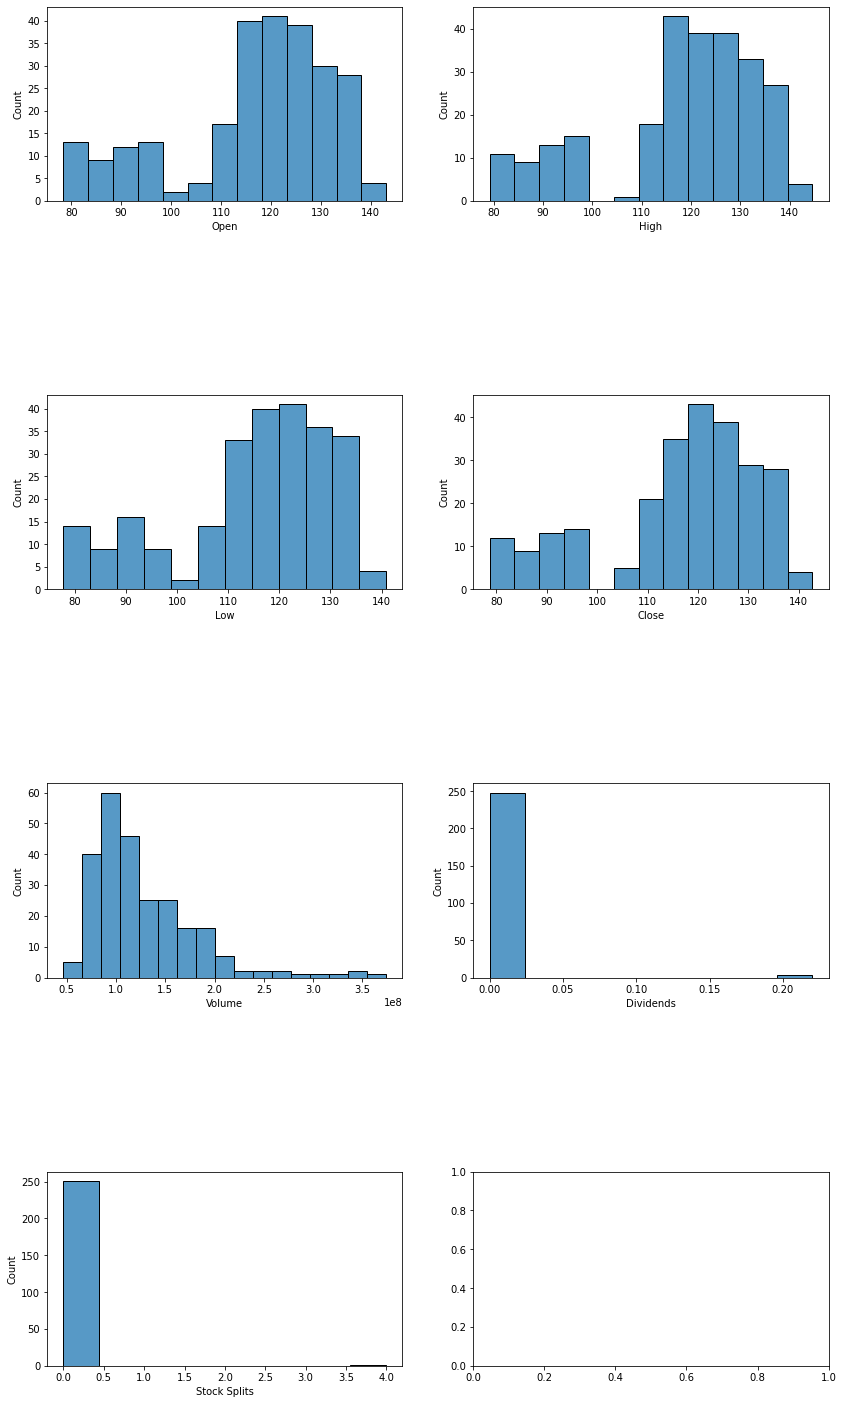

In [11]:
# Distribuição da frequência de valores das colunas 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends'e 'Stock Splits'
fig,axes = plt.subplots(4,2,figsize=(14,25))
for idx,cat_col in enumerate(columns):
    row,col = idx//2,idx%2
    sns.histplot(x=cat_col, data=data,ax=axes[row,col])


plt.subplots_adjust(hspace=1)

## 4. Agrupando o volume médio de ações negociadas na série histórica em termos valores 'Open', 'High', 'Low', 'Close'.

In [12]:
volume_close = data[['Close', 'Volume']].groupby(['Close'], as_index=False).mean().sort_values(by='Volume',ascending=False).head(n=5)

In [13]:
volume_open = data[['Open', 'Volume']].groupby(['Open'], as_index=False).mean().sort_values(by='Volume',ascending=False).head(n=5)

In [14]:
volume_low = data[['Low', 'Volume']].groupby(['Low'], as_index=False).mean().sort_values(by='Volume',ascending=False).head(n=5)

In [15]:
volume_high = data[['High', 'Volume']].groupby(['High'], as_index=False).mean().sort_values(by='Volume',ascending=False).head(n=5)

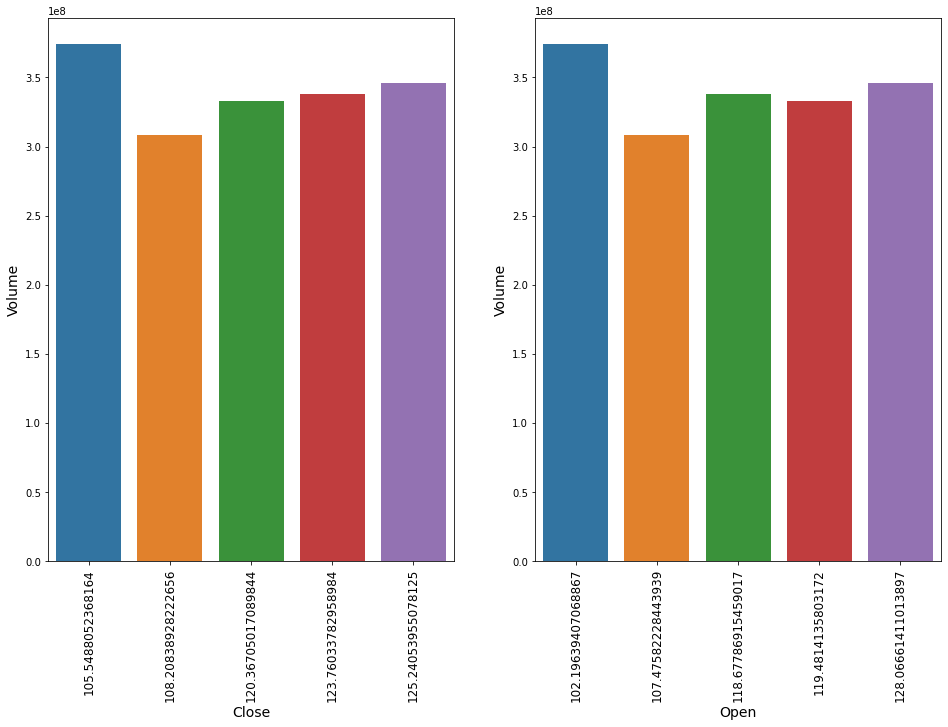

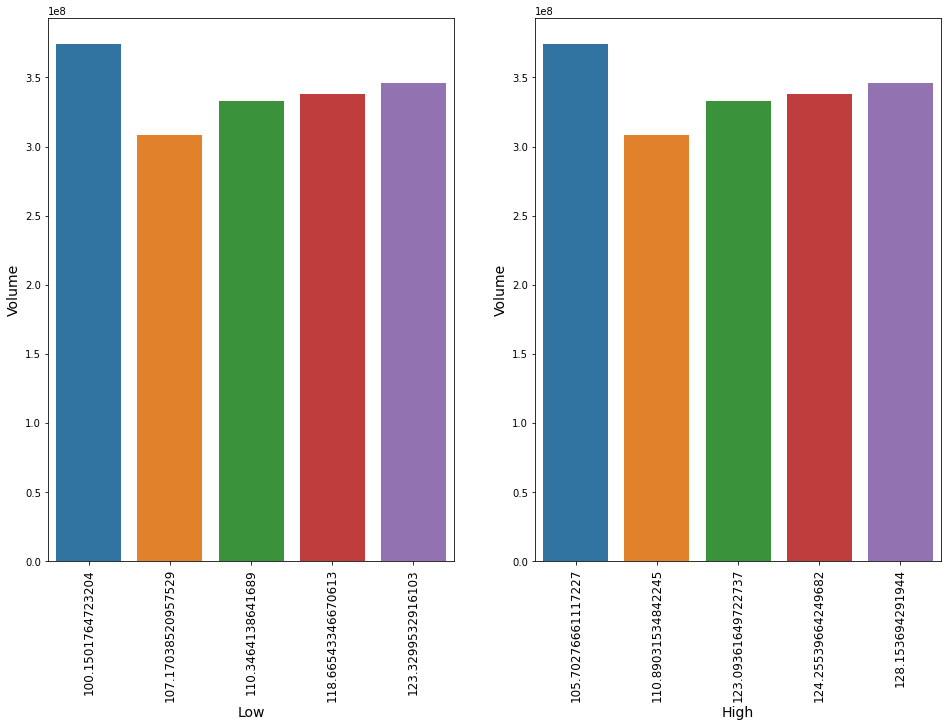

In [16]:
plt.figure(figsize=(16,10))


plt.subplot(1,2,1)
plt.xlabel('Close', size = 14)
plt.ylabel('Volume', size = 14)
plt.xticks(size=12, rotation = 90)
sns.barplot(x='Close', y= 'Volume', data=volume_close)

plt.subplot(1,2,2)
plt.xlabel('Open', size = 14)
plt.ylabel('Volume', size = 14)
plt.xticks(size=12, rotation = 90)
sns.barplot(x='Open', y= 'Volume', data=volume_open)

plt.show()

plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
plt.xlabel('Low', size = 14)
plt.ylabel('Volume', size = 14)
plt.xticks(size=12, rotation = 90)
sns.barplot(x='Low', y= 'Volume', data=volume_low)

plt.subplot(1,2,2)
plt.xlabel('High', size = 14)
plt.ylabel('Volume', size = 14)
plt.xticks(size=12, rotation = 90)
sns.barplot(x='High', y= 'Volume', data=volume_high)

plt.show()

## * O volume médio de ações negociadas em termos do valor de fechamento da ação: O valor de fechamento de 105.55 possui maior volume médio.
## * O volume médio de ações negociadas em termos do valor de abertura da ação: O valor de abertura de 102.20 possui maior volume médio.
## * O volume médio de ações negociadas em termos do valor de baixa da ação: O valor de baixa de 100.15 possui maior volume médio.
## * O volume médio de ações negociadas em termos do valor de alta da ação: O valor de alta de 105.70 possui maior volume médio.